## 3.2.2 Linear regression



###  Create model, compute loss, and optimize the parameters  

1. 所有的层结构和损失函数，都来自torch.nn；因此，所有的模型构建都是从nn.Module继承的。  
2. torch.optim，通过修改参数，使得loss function最小化。  
    一阶优化算法：  
    $$\theta = \theta - \eta * \frac {\partial J(\theta)}{\partial \theta}$$  
    $\eta $ is learning rate. $\frac {\partial J(\theta)}{\partial \theta}$ is the gradient of the function J.  
   We can use torch.optim:   
   e.g optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)   
3. torch.save 
    1. save the constructure of the model and parameters---save model.  
      torch.save(model, './model.pth')
    
    2. save the states of the model.  
      torch.save(model.state_dict(), './model_state.pth'  

4. torch.load
    1. load the constructure of the model and parameters.   
         load_model = torch.load('model.pth')
     
    2. load the states of the model.   
         load_model = model.load_state_dic(torch.load('model_state.pth')
    
 

$$ f(x) = wx + b $$

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [8]:
x = np.array([[2.3],[3.3],[4.4],[5.5],[6.7],[3.1]], dtype=np.float32)
y = np.array([[0.9],[1.7],[2.76],[2.09],[3.19],[1.3]], dtype=np.float32)

# convert numpy to tensor
x = torch.from_numpy(x)
y = torch.from_numpy(y)
print(x)

tensor([[2.3000],
        [3.3000],
        [4.4000],
        [5.5000],
        [6.7000],
        [3.1000]])


In [9]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.Linear = nn.Linear(1, 1)
        
    def forward(self, x):
        output = self.Linear(x)
        return output

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [10]:
critirion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [16]:
from torch.autograd import Variable

for i in range(500):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
    output = model(inputs)
    loss = critirion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
        print('loss is {}'.format(loss.data))

loss is 0.13792981207370758
loss is 0.1377684623003006
loss is 0.137613907456398
loss is 0.13746599853038788
loss is 0.13732431828975677


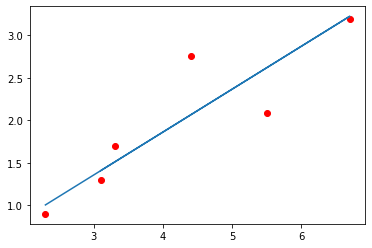

In [18]:
import matplotlib.pyplot as plt

model.eval()
predict = model(Variable(x))
# 将预测值画出来
predict = predict.data.numpy()
plt.plot(x.numpy(), y.numpy(),'ro', label='original data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()

numpy.array 转换成Tensor：torch.from_numpy(x_numpy)   
model.cuda(): 将模型放到GPU上    
每次做反向传播之前，都要做归零梯度：optimizer.zero_grad()  
model.eval(): 将模型变成测试模式； 这是因为有一些层操作，比如dropout 和 BatchNormalization 在 __训练__和 __测试__ 时不一样。  
定义的模型是线性的，所以，在这里，模型预测的值，画出来就是一条直线。


### 多项式回归
$$ y = b + w1*x + w2*x^2 + w3*x^3$$
$$ y = 0.9 + 0.5*x + 3*x^2 + 2.4*x^3$$

In [20]:
# define w, b, x
w = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)     ## unsqueeze(1):将原来的tensor大小由3变成（3，1）。
b = torch.FloatTensor([0.9])

def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, 4)], 1)

In [35]:
# define model
def f(x):
    return x.mm(w) + b

In [22]:
def get_batch(batch_size=32):
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(), Variable(y).cuda()
    else:
        return Variable(x), Variable(y)

In [23]:
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model, self).__init__()
        self.poly = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.poly(x)
        return out

In [24]:
## Compare the f(x) and the class poly_model, then compute the loss
# define the model
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
epoch = 0 
while True:
    batch_x, batch_y = get_batch()
    out = model(batch_x)
    loss = criterion(out, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch += 1
    if (epoch+1)%1000:
        print(loss)
    if loss < 1e-3:
        break



tensor(72.2787, grad_fn=<MseLossBackward>)
tensor(18.1711, grad_fn=<MseLossBackward>)
tensor(189.5407, grad_fn=<MseLossBackward>)
tensor(31.1954, grad_fn=<MseLossBackward>)
tensor(27.0076, grad_fn=<MseLossBackward>)
tensor(9.9079, grad_fn=<MseLossBackward>)
tensor(40.8867, grad_fn=<MseLossBackward>)
tensor(170.2798, grad_fn=<MseLossBackward>)
tensor(217.1426, grad_fn=<MseLossBackward>)
tensor(16.5302, grad_fn=<MseLossBackward>)
tensor(21.0001, grad_fn=<MseLossBackward>)
tensor(31.7558, grad_fn=<MseLossBackward>)
tensor(47.3486, grad_fn=<MseLossBackward>)
tensor(36.7145, grad_fn=<MseLossBackward>)
tensor(78.0644, grad_fn=<MseLossBackward>)
tensor(44.4921, grad_fn=<MseLossBackward>)
tensor(47.6174, grad_fn=<MseLossBackward>)
tensor(89.8377, grad_fn=<MseLossBackward>)
tensor(14.7957, grad_fn=<MseLossBackward>)
tensor(65.5730, grad_fn=<MseLossBackward>)
tensor(54.5707, grad_fn=<MseLossBackward>)
tensor(103.0809, grad_fn=<MseLossBackward>)
tensor(20.2904, grad_fn=<MseLossBackward>)
tensor(1

tensor(2.9899, grad_fn=<MseLossBackward>)
tensor(0.6093, grad_fn=<MseLossBackward>)
tensor(2.3768, grad_fn=<MseLossBackward>)
tensor(0.7536, grad_fn=<MseLossBackward>)
tensor(2.5774, grad_fn=<MseLossBackward>)
tensor(2.9944, grad_fn=<MseLossBackward>)
tensor(0.5969, grad_fn=<MseLossBackward>)
tensor(2.3229, grad_fn=<MseLossBackward>)
tensor(1.1629, grad_fn=<MseLossBackward>)
tensor(1.8479, grad_fn=<MseLossBackward>)
tensor(0.8798, grad_fn=<MseLossBackward>)
tensor(0.2095, grad_fn=<MseLossBackward>)
tensor(1.4860, grad_fn=<MseLossBackward>)
tensor(2.7628, grad_fn=<MseLossBackward>)
tensor(0.9455, grad_fn=<MseLossBackward>)
tensor(1.2941, grad_fn=<MseLossBackward>)
tensor(0.7683, grad_fn=<MseLossBackward>)
tensor(0.8456, grad_fn=<MseLossBackward>)
tensor(0.6076, grad_fn=<MseLossBackward>)
tensor(3.9260, grad_fn=<MseLossBackward>)
tensor(0.9464, grad_fn=<MseLossBackward>)
tensor(0.5812, grad_fn=<MseLossBackward>)
tensor(1.1787, grad_fn=<MseLossBackward>)
tensor(1.4856, grad_fn=<MseLossBac

tensor(0.1908, grad_fn=<MseLossBackward>)
tensor(0.1903, grad_fn=<MseLossBackward>)
tensor(0.1806, grad_fn=<MseLossBackward>)
tensor(0.1471, grad_fn=<MseLossBackward>)
tensor(0.1603, grad_fn=<MseLossBackward>)
tensor(0.1454, grad_fn=<MseLossBackward>)
tensor(0.1150, grad_fn=<MseLossBackward>)
tensor(0.1340, grad_fn=<MseLossBackward>)
tensor(0.1445, grad_fn=<MseLossBackward>)
tensor(0.1599, grad_fn=<MseLossBackward>)
tensor(0.2057, grad_fn=<MseLossBackward>)
tensor(0.1859, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)
tensor(0.4809, grad_fn=<MseLossBackward>)
tensor(0.2175, grad_fn=<MseLossBackward>)
tensor(0.1325, grad_fn=<MseLossBackward>)
tensor(0.0928, grad_fn=<MseLossBackward>)
tensor(0.1071, grad_fn=<MseLossBackward>)
tensor(0.2196, grad_fn=<MseLossBackward>)
tensor(0.1355, grad_fn=<MseLossBackward>)
tensor(0.1590, grad_fn=<MseLossBackward>)
tensor(0.0978, grad_fn=<MseLossBackward>)
tensor(0.1337, grad_fn=<MseLossBackward>)
tensor(0.2495, grad_fn=<MseLossBac

tensor(0.0482, grad_fn=<MseLossBackward>)
tensor(0.0590, grad_fn=<MseLossBackward>)
tensor(0.0611, grad_fn=<MseLossBackward>)
tensor(0.1094, grad_fn=<MseLossBackward>)
tensor(0.0918, grad_fn=<MseLossBackward>)
tensor(0.0731, grad_fn=<MseLossBackward>)
tensor(0.0625, grad_fn=<MseLossBackward>)
tensor(0.0655, grad_fn=<MseLossBackward>)
tensor(0.0521, grad_fn=<MseLossBackward>)
tensor(0.0870, grad_fn=<MseLossBackward>)
tensor(0.0817, grad_fn=<MseLossBackward>)
tensor(0.0678, grad_fn=<MseLossBackward>)
tensor(0.0590, grad_fn=<MseLossBackward>)
tensor(0.1112, grad_fn=<MseLossBackward>)
tensor(0.0563, grad_fn=<MseLossBackward>)
tensor(0.0671, grad_fn=<MseLossBackward>)
tensor(0.1181, grad_fn=<MseLossBackward>)
tensor(0.0605, grad_fn=<MseLossBackward>)
tensor(0.0622, grad_fn=<MseLossBackward>)
tensor(0.0717, grad_fn=<MseLossBackward>)
tensor(0.0665, grad_fn=<MseLossBackward>)
tensor(0.0595, grad_fn=<MseLossBackward>)
tensor(0.0710, grad_fn=<MseLossBackward>)
tensor(0.0681, grad_fn=<MseLossBac

tensor(0.0243, grad_fn=<MseLossBackward>)
tensor(0.0301, grad_fn=<MseLossBackward>)
tensor(0.0282, grad_fn=<MseLossBackward>)
tensor(0.0273, grad_fn=<MseLossBackward>)
tensor(0.0262, grad_fn=<MseLossBackward>)
tensor(0.0322, grad_fn=<MseLossBackward>)
tensor(0.0309, grad_fn=<MseLossBackward>)
tensor(0.0309, grad_fn=<MseLossBackward>)
tensor(0.0272, grad_fn=<MseLossBackward>)
tensor(0.0256, grad_fn=<MseLossBackward>)
tensor(0.0248, grad_fn=<MseLossBackward>)
tensor(0.0314, grad_fn=<MseLossBackward>)
tensor(0.0348, grad_fn=<MseLossBackward>)
tensor(0.0703, grad_fn=<MseLossBackward>)
tensor(0.0237, grad_fn=<MseLossBackward>)
tensor(0.0314, grad_fn=<MseLossBackward>)
tensor(0.0479, grad_fn=<MseLossBackward>)
tensor(0.0277, grad_fn=<MseLossBackward>)
tensor(0.0336, grad_fn=<MseLossBackward>)
tensor(0.0531, grad_fn=<MseLossBackward>)
tensor(0.0264, grad_fn=<MseLossBackward>)
tensor(0.0338, grad_fn=<MseLossBackward>)
tensor(0.0262, grad_fn=<MseLossBackward>)
tensor(0.0226, grad_fn=<MseLossBac

tensor(0.0103, grad_fn=<MseLossBackward>)
tensor(0.0153, grad_fn=<MseLossBackward>)
tensor(0.0226, grad_fn=<MseLossBackward>)
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0148, grad_fn=<MseLossBackward>)
tensor(0.0145, grad_fn=<MseLossBackward>)
tensor(0.0137, grad_fn=<MseLossBackward>)
tensor(0.0123, grad_fn=<MseLossBackward>)
tensor(0.0140, grad_fn=<MseLossBackward>)
tensor(0.0106, grad_fn=<MseLossBackward>)
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0153, grad_fn=<MseLossBackward>)
tensor(0.0111, grad_fn=<MseLossBackward>)
tensor(0.0200, grad_fn=<MseLossBackward>)
tensor(0.0198, grad_fn=<MseLossBackward>)
tensor(0.0103, grad_fn=<MseLossBackward>)
tensor(0.0119, grad_fn=<MseLossBackward>)
tensor(0.0112, grad_fn=<MseLossBackward>)
tensor(0.0127, grad_fn=<MseLossBackward>)
tensor(0.0122, grad_fn=<MseLossBackward>)
tensor(0.0121, grad_fn=<MseLossBackward>)
tensor(0.0104, grad_fn=<MseLossBackward>)
tensor(0.0114, grad_fn=<MseLossBackward>)
tensor(0.0162, grad_fn=<MseLossBac

tensor(0.0075, grad_fn=<MseLossBackward>)
tensor(0.0054, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0060, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0066, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn=<MseLossBackward>)
tensor(0.0056, grad_fn=<MseLossBackward>)
tensor(0.0053, grad_fn=<MseLossBackward>)
tensor(0.0060, grad_fn=<MseLossBackward>)
tensor(0.0074, grad_fn=<MseLossBackward>)
tensor(0.0054, grad_fn=<MseLossBackward>)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0054, grad_fn=<MseLossBackward>)
tensor(0.0059, grad_fn=<MseLossBackward>)
tensor(0.0052, grad_fn=<MseLossBackward>)
tensor(0.0069, grad_fn=<MseLossBackward>)
tensor(0.0062, grad_fn=<MseLossBackward>)
tensor(0.0057, grad_fn=<MseLossBac

tensor(0.0030, grad_fn=<MseLossBackward>)
tensor(0.0027, grad_fn=<MseLossBackward>)
tensor(0.0021, grad_fn=<MseLossBackward>)
tensor(0.0027, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0028, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0108, grad_fn=<MseLossBackward>)
tensor(0.0030, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0031, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0028, grad_fn=<MseLossBackward>)
tensor(0.0024, grad_fn=<MseLossBackward>)
tensor(0.0022, grad_fn=<MseLossBackward>)
tensor(0.0030, grad_fn=<MseLossBackward>)
tensor(0.0026, grad_fn=<MseLossBackward>)
tensor(0.0025, grad_fn=<MseLossBac

In [49]:
numpyx = np.arange(-1, 1, 0.25, dtype='float32')  ### here dtype='float32' is important.
x = torch.from_numpy(numpyx)
x = make_features(x)
y = f(x)

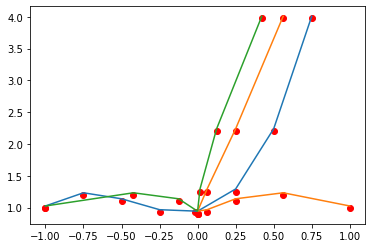

In [50]:
numx = x.numpy()
numy = y.numpy()

predict = model(x)
predict = predict.data.numpy()
plt.plot(numx, numy, 'ro', label='original data')
plt.plot(x, predict, label='fitting')

# 3.3 Classification   
二分类算法- __Logistic回归__   

## 3.3.3 Logistic distribution   
Supposed that X是连续的随机变量，服从Logistic分布是指X的积累分布函数如下：
$$ F(x) = P(X ≤ x) = \frac{1}{1 + e^{-(x-u)/r}}$$
u 影响中心对称点的位置, r越小，中心点附近的增长速度越快。  

Sigmoid函数，Logistic分布函数中r=1，u=0的形式： 
$$ P(x) = \frac{1}{1 + e^{-x}}$$ 

## 3.3.4 two-class Logistic regression  
对于二分类问题，Logistic回归的目标：希望找到一个区分度好的决策边界。  
假设样本的部分点A：$$ h_{w}(x) = \sum {w_i * x_i + b} > 0$$ 
   另外的样本点B：$$ h_{w}(x) = \sum {w_i * x_i + b} < 0$$ 
   属于A的，可以判定它的类别为1；属于B的，可以判定它的类别是0.  
   $$P(Y=0|x) = \frac{1}{1 + e^{w*x +b}}$$
   $$P(Y=1|x) = \frac{e^{w*x + b}}{1 + e^{w*x +b}}$$
   
### logit function:
$$logit(p) = log(\frac{p}{1-p})$$
$$log(\frac{P(Y=1|x)}{P(Y=0|x)}) = w*x + b  $$
$$log(\frac{P(Y=1|x)}{1- P(Y=1|x)}) = w*x + b $$
在Logistic回归模型中，输出Y=1的对数几率 是 输入x的线性函数。